### Data Visualizations on the Correlation Between Miles and Duration

In this section, we explore the relationship between the **Miles** traveled and the **Duration** of trips using three key visualizations. These plots help us understand how these two variables are related and provide insights into their correlation.

#### 1. **Miles Distribution**

The first graph is a **Histogram** of trip distances (in miles), which gives us a sense of the frequency distribution of miles across all trips. The histogram allows us to observe the general spread of trip distances and identify any patterns such as:
- A concentration of trips around certain mile values.
- Skewness in the data, which could suggest that most trips are either short or long.

#### 2. **Duration Distribution**

The second graph is a **Histogram** of trip durations (in minutes), providing insight into how long most trips take. From this graph, we can observe:
- Whether most trips are relatively short or long in duration.
- The potential presence of any outliers or unusual duration values that might skew our analysis.

#### 3. **Miles vs Duration Correlation (Scatter Plot with Trend Line)**

The third graph is a **Scatter Plot with a Regression Line**, which directly visualizes the relationship between **Miles** and **Duration**. This plot displays each trip's miles and duration as points on a 2D plane, with a red regression line indicating the general trend. Key insights include:
- Whether there is a linear relationship between the distance traveled and the duration of the trip.
- The strength of this relationship, which can be quantified by the correlation coefficient (Pearson's r). The closer the points are to the regression line, the stronger the correlation.

This correlation plot helps to:
- Confirm if longer trips are generally associated with longer durations.
- Identify any potential outliers or unusual patterns in the data that deviate from the overall trend.

---

By analyzing these visualizations, we can conclude whether there is a significant relationship between **Miles** and **Duration**, and gain insights into trip patterns that can be useful for further analysis or decision-making.

In [31]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations

# Read the CSV file into a pandas DataFrame
uber_data = pd.read_csv('UberDataset.csv')  # Load the dataset from the provided file

# Convert the 'START_DATE' column to datetime format
# The 'errors="coerce"' argument will replace invalid parsing with NaT (Not a Time)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Convert the 'END_DATE' column to datetime format
# This ensures consistency in date-time processing for further analysis
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Drop rows with invalid dates
uber_data = uber_data.dropna(subset=['START_DATE', 'END_DATE'])

In [32]:
# Display the first 5 rows of the dataset to get an overview of its structure and content
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [33]:
# Calculate the trip duration in minutes by subtracting the START_DATE from the END_DATE
# Convert the result from seconds to minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

# Display the first few rows of the dataset to verify the new 'DURATION' column
# This helps ensure that the calculation was done correctly
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


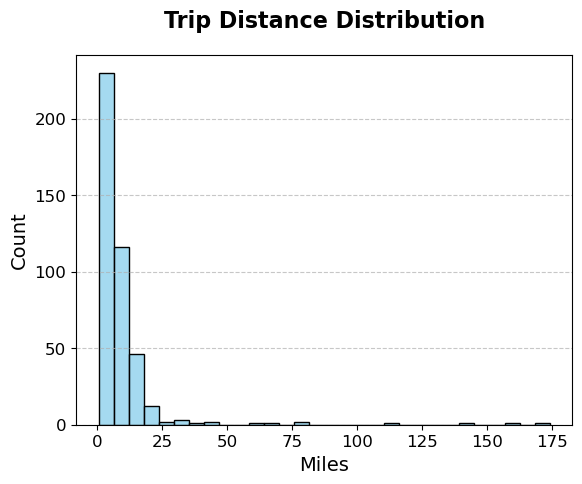

In [34]:
### Section 1: Miles Distribution ###

# Create a histogram to visualize the distribution of the 'MILES' column
sns.histplot(data=uber_data, x='MILES', bins=30, color='skyblue', edgecolor='black')

# Add a title to the plot with customized font size, padding, and bold font weight
plt.title('Trip Distance Distribution', fontsize=16, pad=20, fontweight='bold')

# Label the x-axis as 'Miles' with increased font size for readability
plt.xlabel('Miles', fontsize=14)

# Label the y-axis as 'Count' with increased font size for readability
plt.ylabel('Count', fontsize=14)

# Customize the tick labels on both axes for better clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid lines to the y-axis to improve readability of the distribution
# Use dashed lines with slight transparency (alpha)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

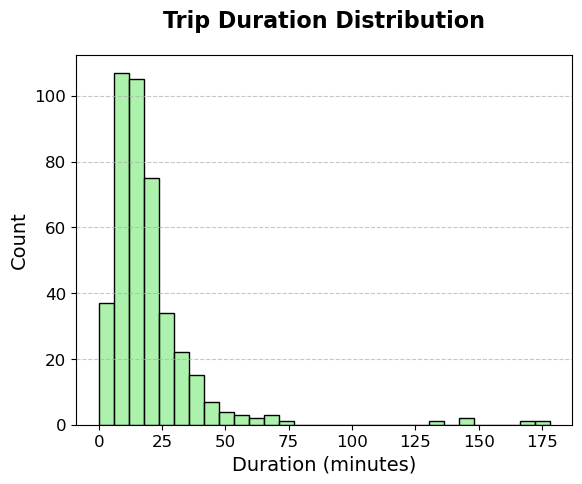

In [35]:
### Section 2: Duration Distribution ###

# Create a histogram to visualize the distribution of the 'DURATION' column
sns.histplot(data=uber_data, x='DURATION', bins=30, color='lightgreen', edgecolor='black')

# Add a title to the plot with customized font size, padding, and bold font weight
plt.title('Trip Duration Distribution', fontsize=16, pad=20, fontweight='bold')

# Label the x-axis as 'Duration (minutes)' to specify the unit, with increased font size for readability
plt.xlabel('Duration (minutes)', fontsize=14)

# Label the y-axis as 'Count', indicating the frequency of trips within each duration bin
plt.ylabel('Count', fontsize=14)

# Customize the tick labels on both axes for improved clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid lines to the y-axis to aid in interpreting the distribution
# Use dashed lines with slight transparency (alpha)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()


Correlation between Miles and Duration: 0.746


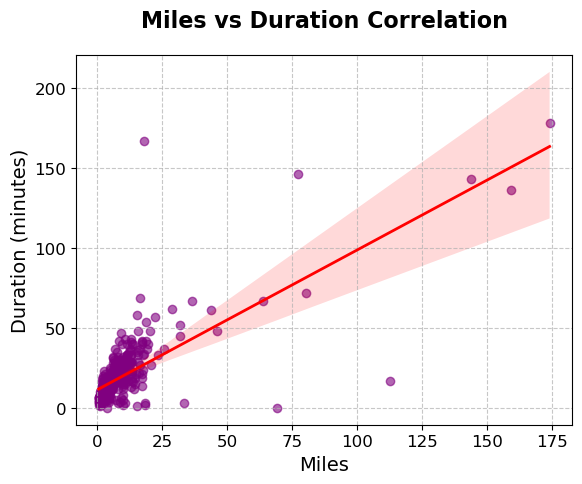

In [36]:
### Section 4: Miles vs Duration Scatter Plot with Trend Line ###

# Create a scatter plot to visualize the relationship between 'MILES' and 'DURATION'
# Use a regression line to show the trend and correlation between the two variables
sns.regplot(
    data=uber_data,  # Dataset to use for the plot
    x='MILES',       # Column for the x-axis (independent variable)
    y='DURATION',    # Column for the y-axis (dependent variable)
    scatter_kws={'alpha': 0.6},  # Adjust the transparency of scatter points for better readability
    line_kws={'color': 'red', 'linewidth': 2},  # Customize the regression line's color and thickness
    color='purple'  # Set the color of the scatter points
)

# Set the title for the plot with enhanced formatting for clarity and aesthetics
plt.title('Miles vs Duration Correlation', fontsize=16, pad=20, fontweight='bold')

# Label the x-axis as 'Miles' to indicate the independent variable
plt.xlabel('Miles', fontsize=14)

# Label the y-axis as 'Duration (minutes)' to indicate the dependent variable
plt.ylabel('Duration (minutes)', fontsize=14)

# Customize the font size of tick labels on both axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines to the plot for easier interpretation of data points and regression line
plt.grid(linestyle='--', alpha=0.7)

# Calculate and print the Pearson correlation coefficient to quantify the relationship between Miles and Duration
correlation = uber_data['MILES'].corr(uber_data['DURATION'])
print("Correlation between Miles and Duration:", round(correlation, 3))

# Display the scatter plot with the regression line
plt.show()
